<a href="https://colab.research.google.com/github/shibania/Loan-Approval-prediction/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('/content/loan_approval_dataset.csv')

In [7]:
data.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [10]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [13]:
columns_to_remove=['loan_id']
data.drop(columns=columns_to_remove, inplace=True)

In [14]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [15]:
print("dataset shape:",data.shape)

dataset shape: (4269, 12)


In [16]:
#movable assets
data['Movable_assets'] = data[' bank_asset_value'] + data[' luxury_assets_value']

In [17]:
#immovable assets
data['Immovable_assets'] = data[' residential_assets_value'] + data[' commercial_assets_value']

In [18]:
data.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [19]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' loan_status',
       'Movable_assets', 'Immovable_assets'],
      dtype='object')

In [20]:
def uniquevals(col):
    print(f'Unique Values in {col} is : {data[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(data[col].value_counts())}')




for col in data.columns:
    valuecounts(col)
#     uniquevals(col)
    print("-"*30)

Valuecounts of  no_of_dependents is: 6
------------------------------
Valuecounts of  education is: 2
------------------------------
Valuecounts of  self_employed is: 2
------------------------------
Valuecounts of  income_annum is: 98
------------------------------
Valuecounts of  loan_amount is: 378
------------------------------
Valuecounts of  loan_term is: 10
------------------------------
Valuecounts of  cibil_score is: 601
------------------------------
Valuecounts of  loan_status is: 2
------------------------------
Valuecounts of Movable_assets is: 484
------------------------------
Valuecounts of Immovable_assets is: 406
------------------------------


In [21]:
catvars=data.select_dtypes(include=['object']).columns
numvars=data.select_dtypes(include=['int32','int64','float32','float64']).columns

In [22]:
catvars,numvars

(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', 'Movable_assets', 'Immovable_assets'],
       dtype='object'))

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**EXPLORATORY DATA ANALYSIS**

NUMBER OF DEPENDENTS DISTRIBUTION

Text(0.5, 1.0, 'NUMBER OF DEPENDENTS')

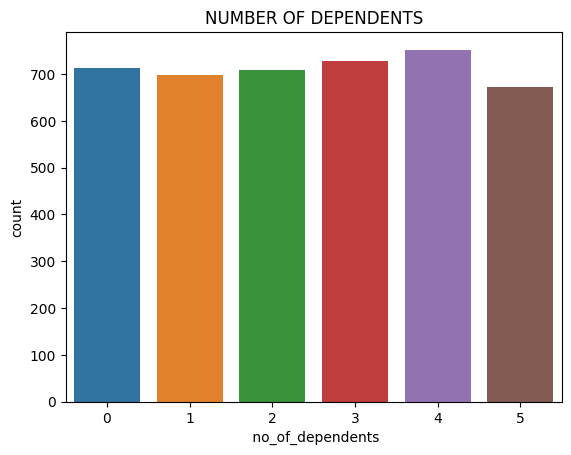

In [24]:
sns.countplot(x=' no_of_dependents',data=data).set_title("NUMBER OF DEPENDENTS")

NUMBER OF DEPENDANTS VS LOAN STATUS

<Axes: xlabel=' no_of_dependents', ylabel='count'>

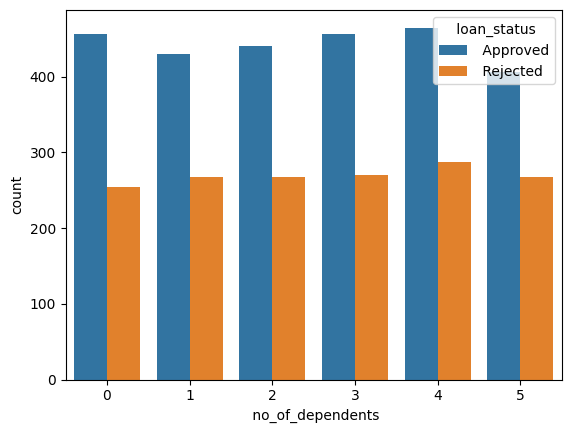

In [25]:
sns.countplot(x=' no_of_dependents',data=data,hue=' loan_status')

This graph illustrate that applicant those who have more number of dependents have less chance of loan approval when compared to others.

Education and Self Employed

Text(0.5, 1.0, 'Self Employed')

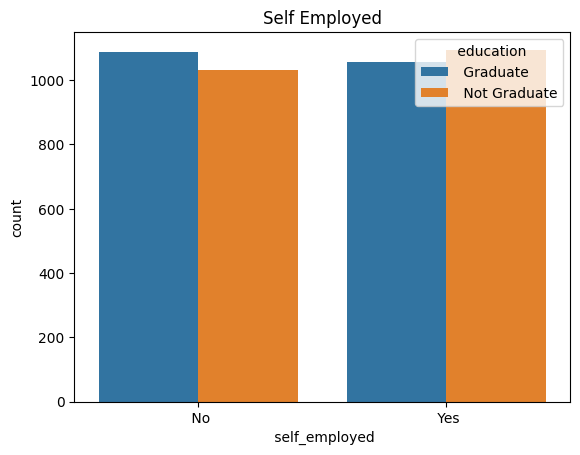

In [26]:
sns.countplot(x=' self_employed',data=data,hue=' education').set_title('Self Employed')

This graph shows that most of the non-graduates are self employed when compared to graduates.They might have a fluctuating income so that the chances for loan approval is low.

Education and Income

<Axes: xlabel=' education', ylabel=' income_annum'>

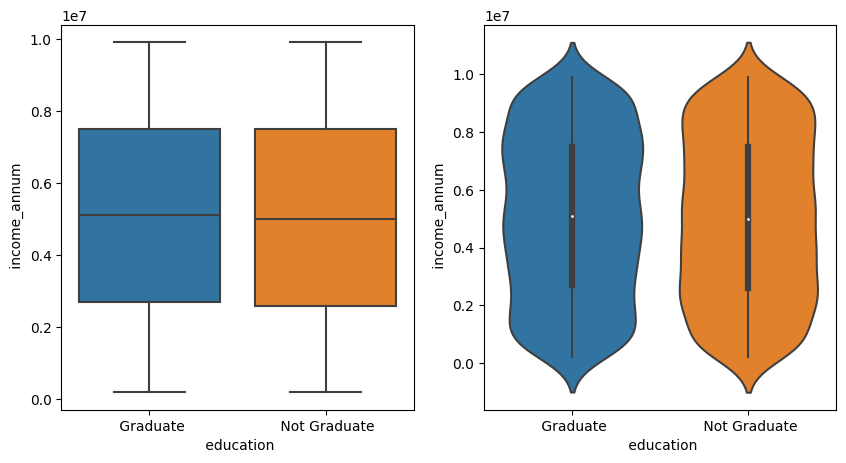

In [27]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = data, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = data, ax=ax[1])

Box Plot infers that both graduates and non graduates have the same median income
Violin Plot shows the distribution of income among the non graduate between 2000000 and 8000000 whereas there is an uneven distribution between 6000000 and 8000000.

Education vs Loan Status

Text(0.5, 1.0, 'loan status by education')

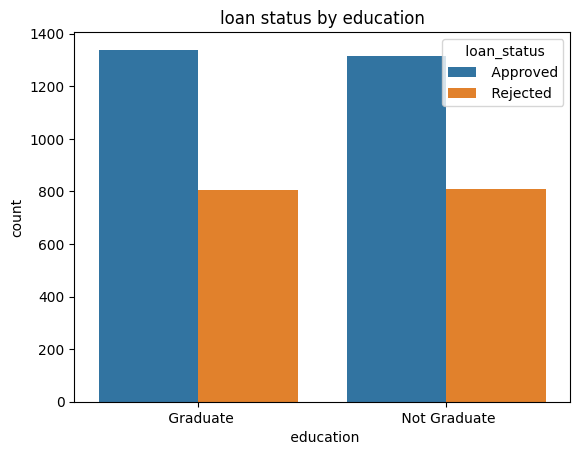

In [28]:
sns.countplot(x=' education', hue=' loan_status',data=data).set_title('loan status by education')

The graph indicates that there's only a small difference between the number of loans approved and rejected for both graduate and non-graduate applicants

Loan_amount and terms


Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

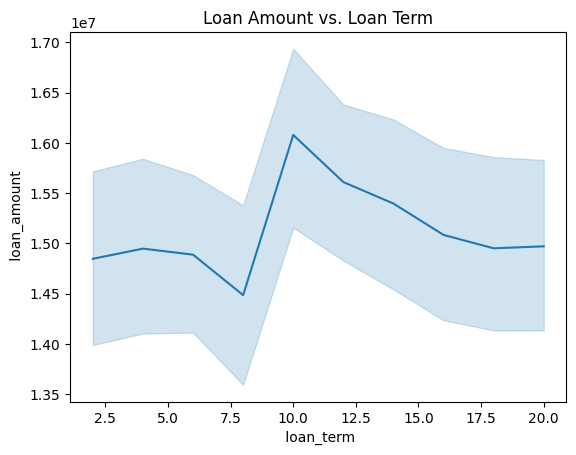

In [29]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = data).set_title('Loan Amount vs. Loan Term')

This line plot infer that the loan amount is significantly higher for 10 years

Loan Amount and Loan Status

<Axes: xlabel=' loan_status', ylabel=' loan_amount'>

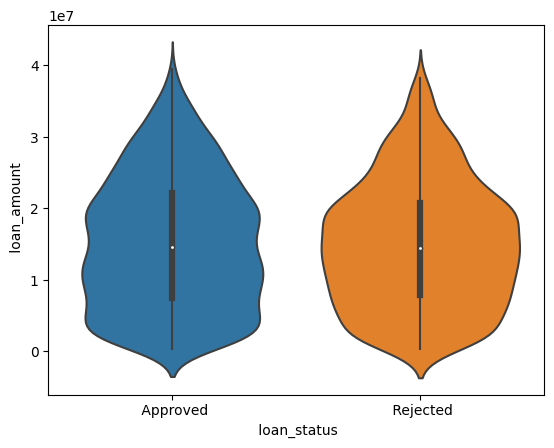

In [30]:
sns.violinplot(x=' loan_status',y=' loan_amount',data=data)

Loan amount and tenure vs Loan Status

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

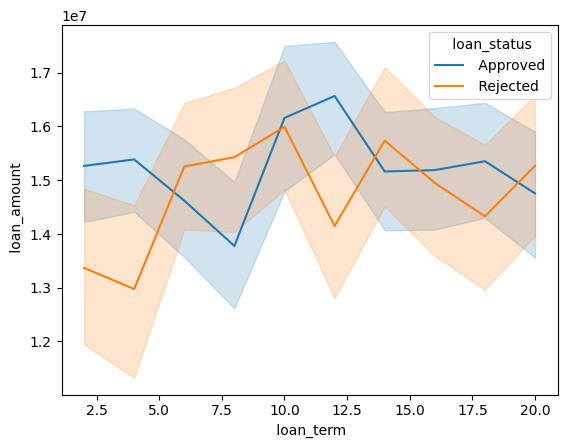

In [31]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=data, hue=' loan_status')

Cibil score distribution

<Axes: xlabel=' cibil_score', ylabel='Count'>

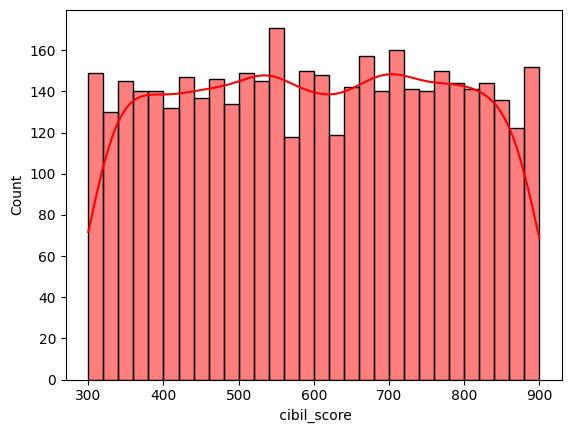

In [32]:
sns.histplot(data[" cibil_score"],bins=30, kde=True, color='red')

This Histplot shows that most customers have low CIBIL scores which will be difficult to get the loan approval. But there's a good number of customers with high scores (above 649), which is positive for the bank.

CIBIL Score vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

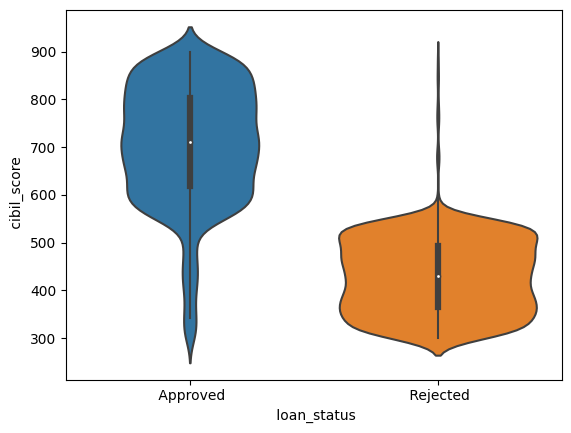

In [33]:
sns.violinplot(x=' loan_status',y=' cibil_score',data=data)

Violin plot infer that the applicants with CIBIL Score greater than 600 got their loan approved.

Asset Distribution

Text(0.5, 1.0, 'Immovable_assets ')

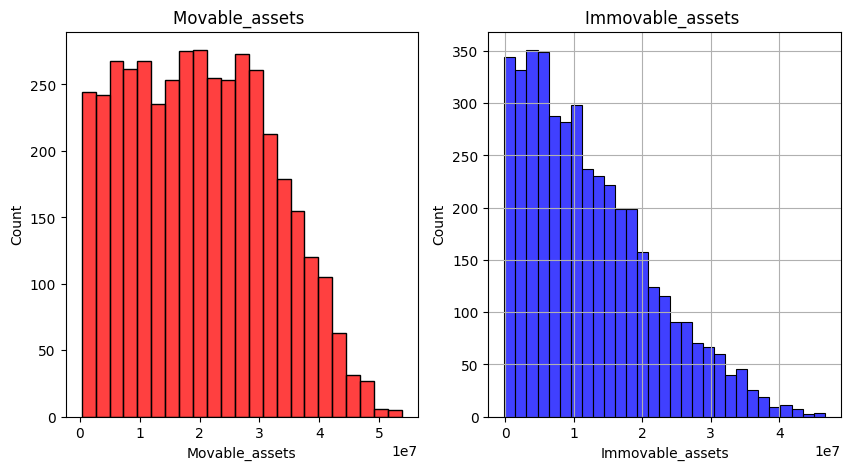

In [34]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(data['Movable_assets'], ax=ax[0], color='red')
plt.title("Movable_assets ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(data['Immovable_assets'], ax=ax[1], color='blue')
plt.title("Immovable_assets ")

Assets Vs Loan Status

<Axes: xlabel='Immovable_assets', ylabel='Count'>

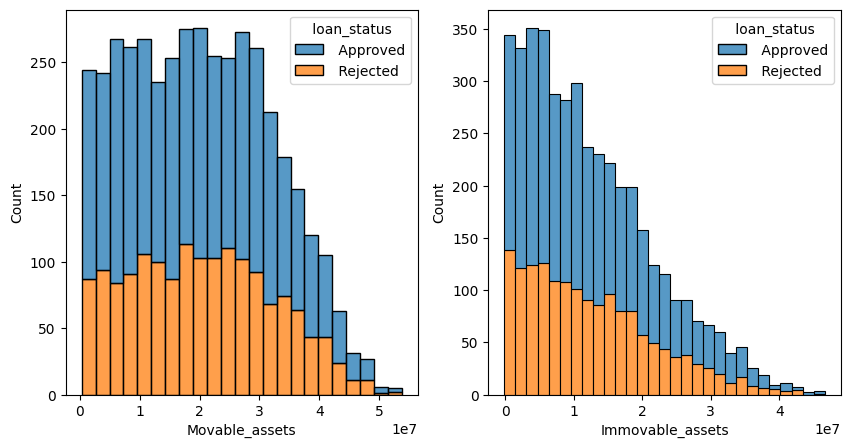

In [35]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x= 'Movable_assets', data = data, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x = 'Immovable_assets', data = data, ax=ax[1], hue  = ' loan_status', multiple='stack')

These graphs display how movable and immovable assets relate to loan approval. Both graphs indicate that as assets increase, the likelihood of loan approval goes up, and the chances of rejection decrease.

**DATA PREPROCESSING**

Label Encoding

In [36]:
data[' education']=data[' education'].map({' Not Graduate':0, ' Graduate':1})
data[' self_employed']=data[' self_employed'].map({' No':0, ' Yes':1})
data[' loan_status']=data[' loan_status'].map({' Rejected':0, ' Approved':1})


In [37]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


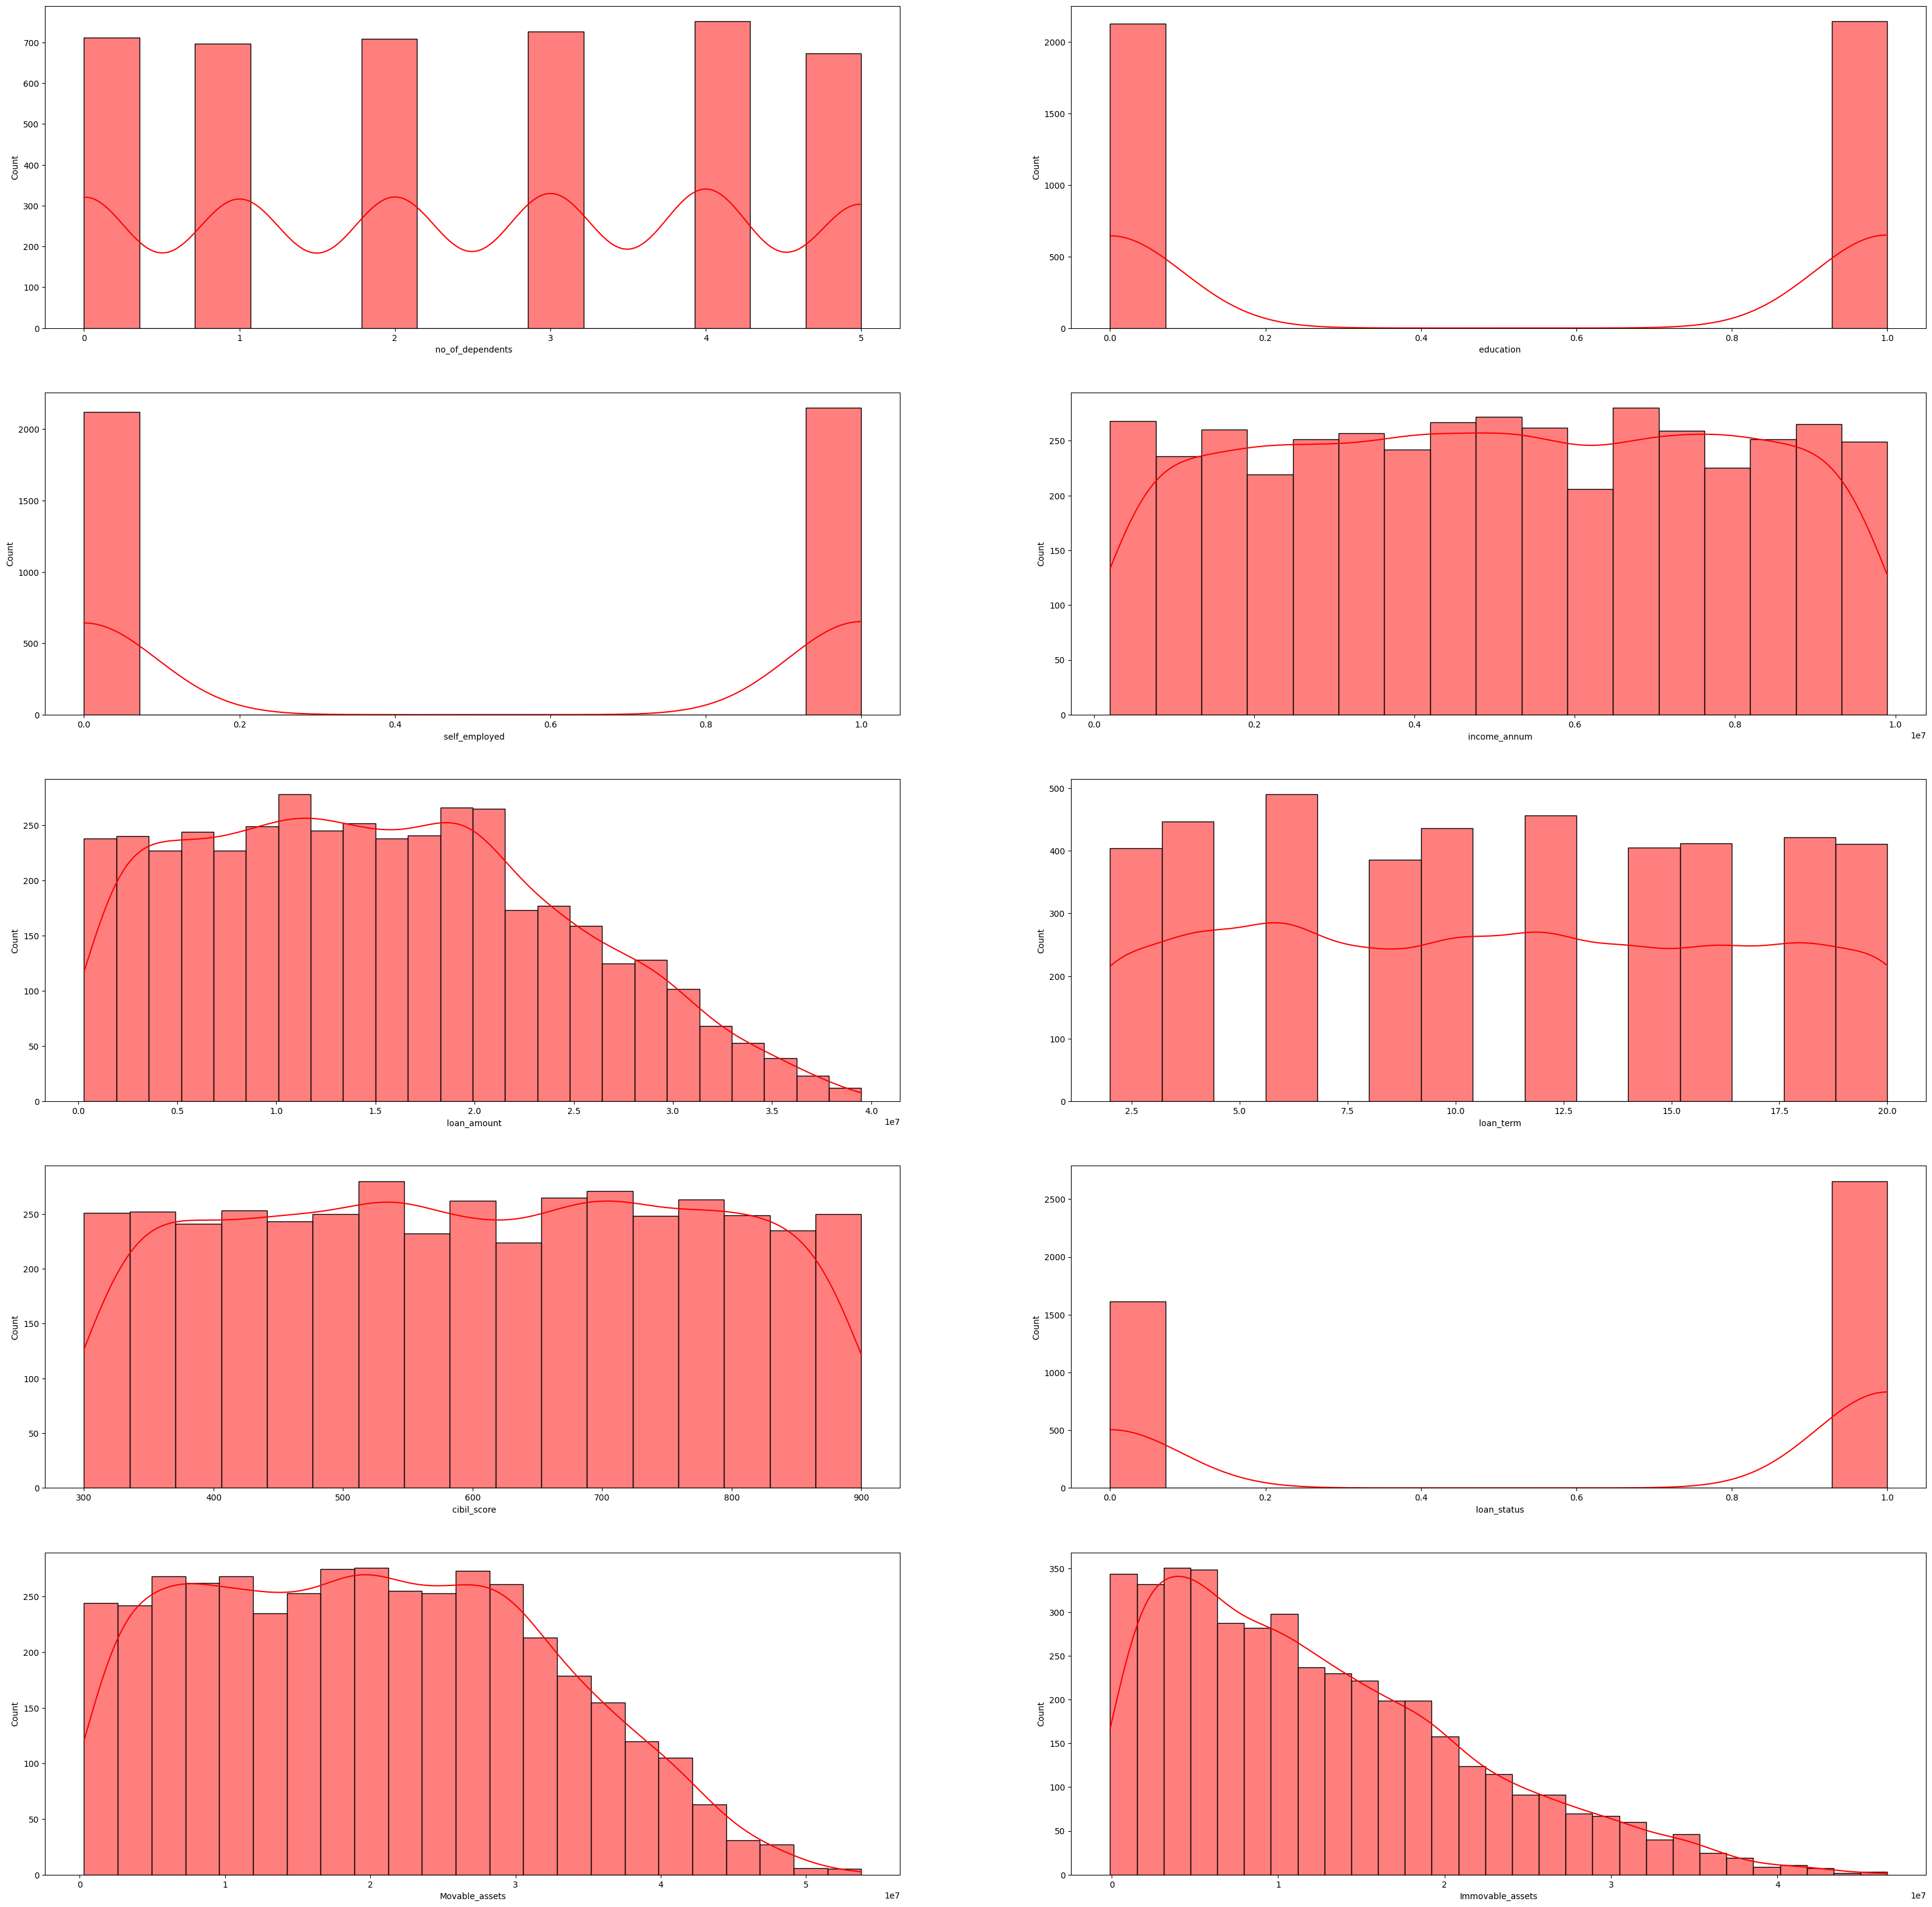

In [38]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, data.columns):
    sns.histplot(data[col],kde=True, color='red', ax = ax)

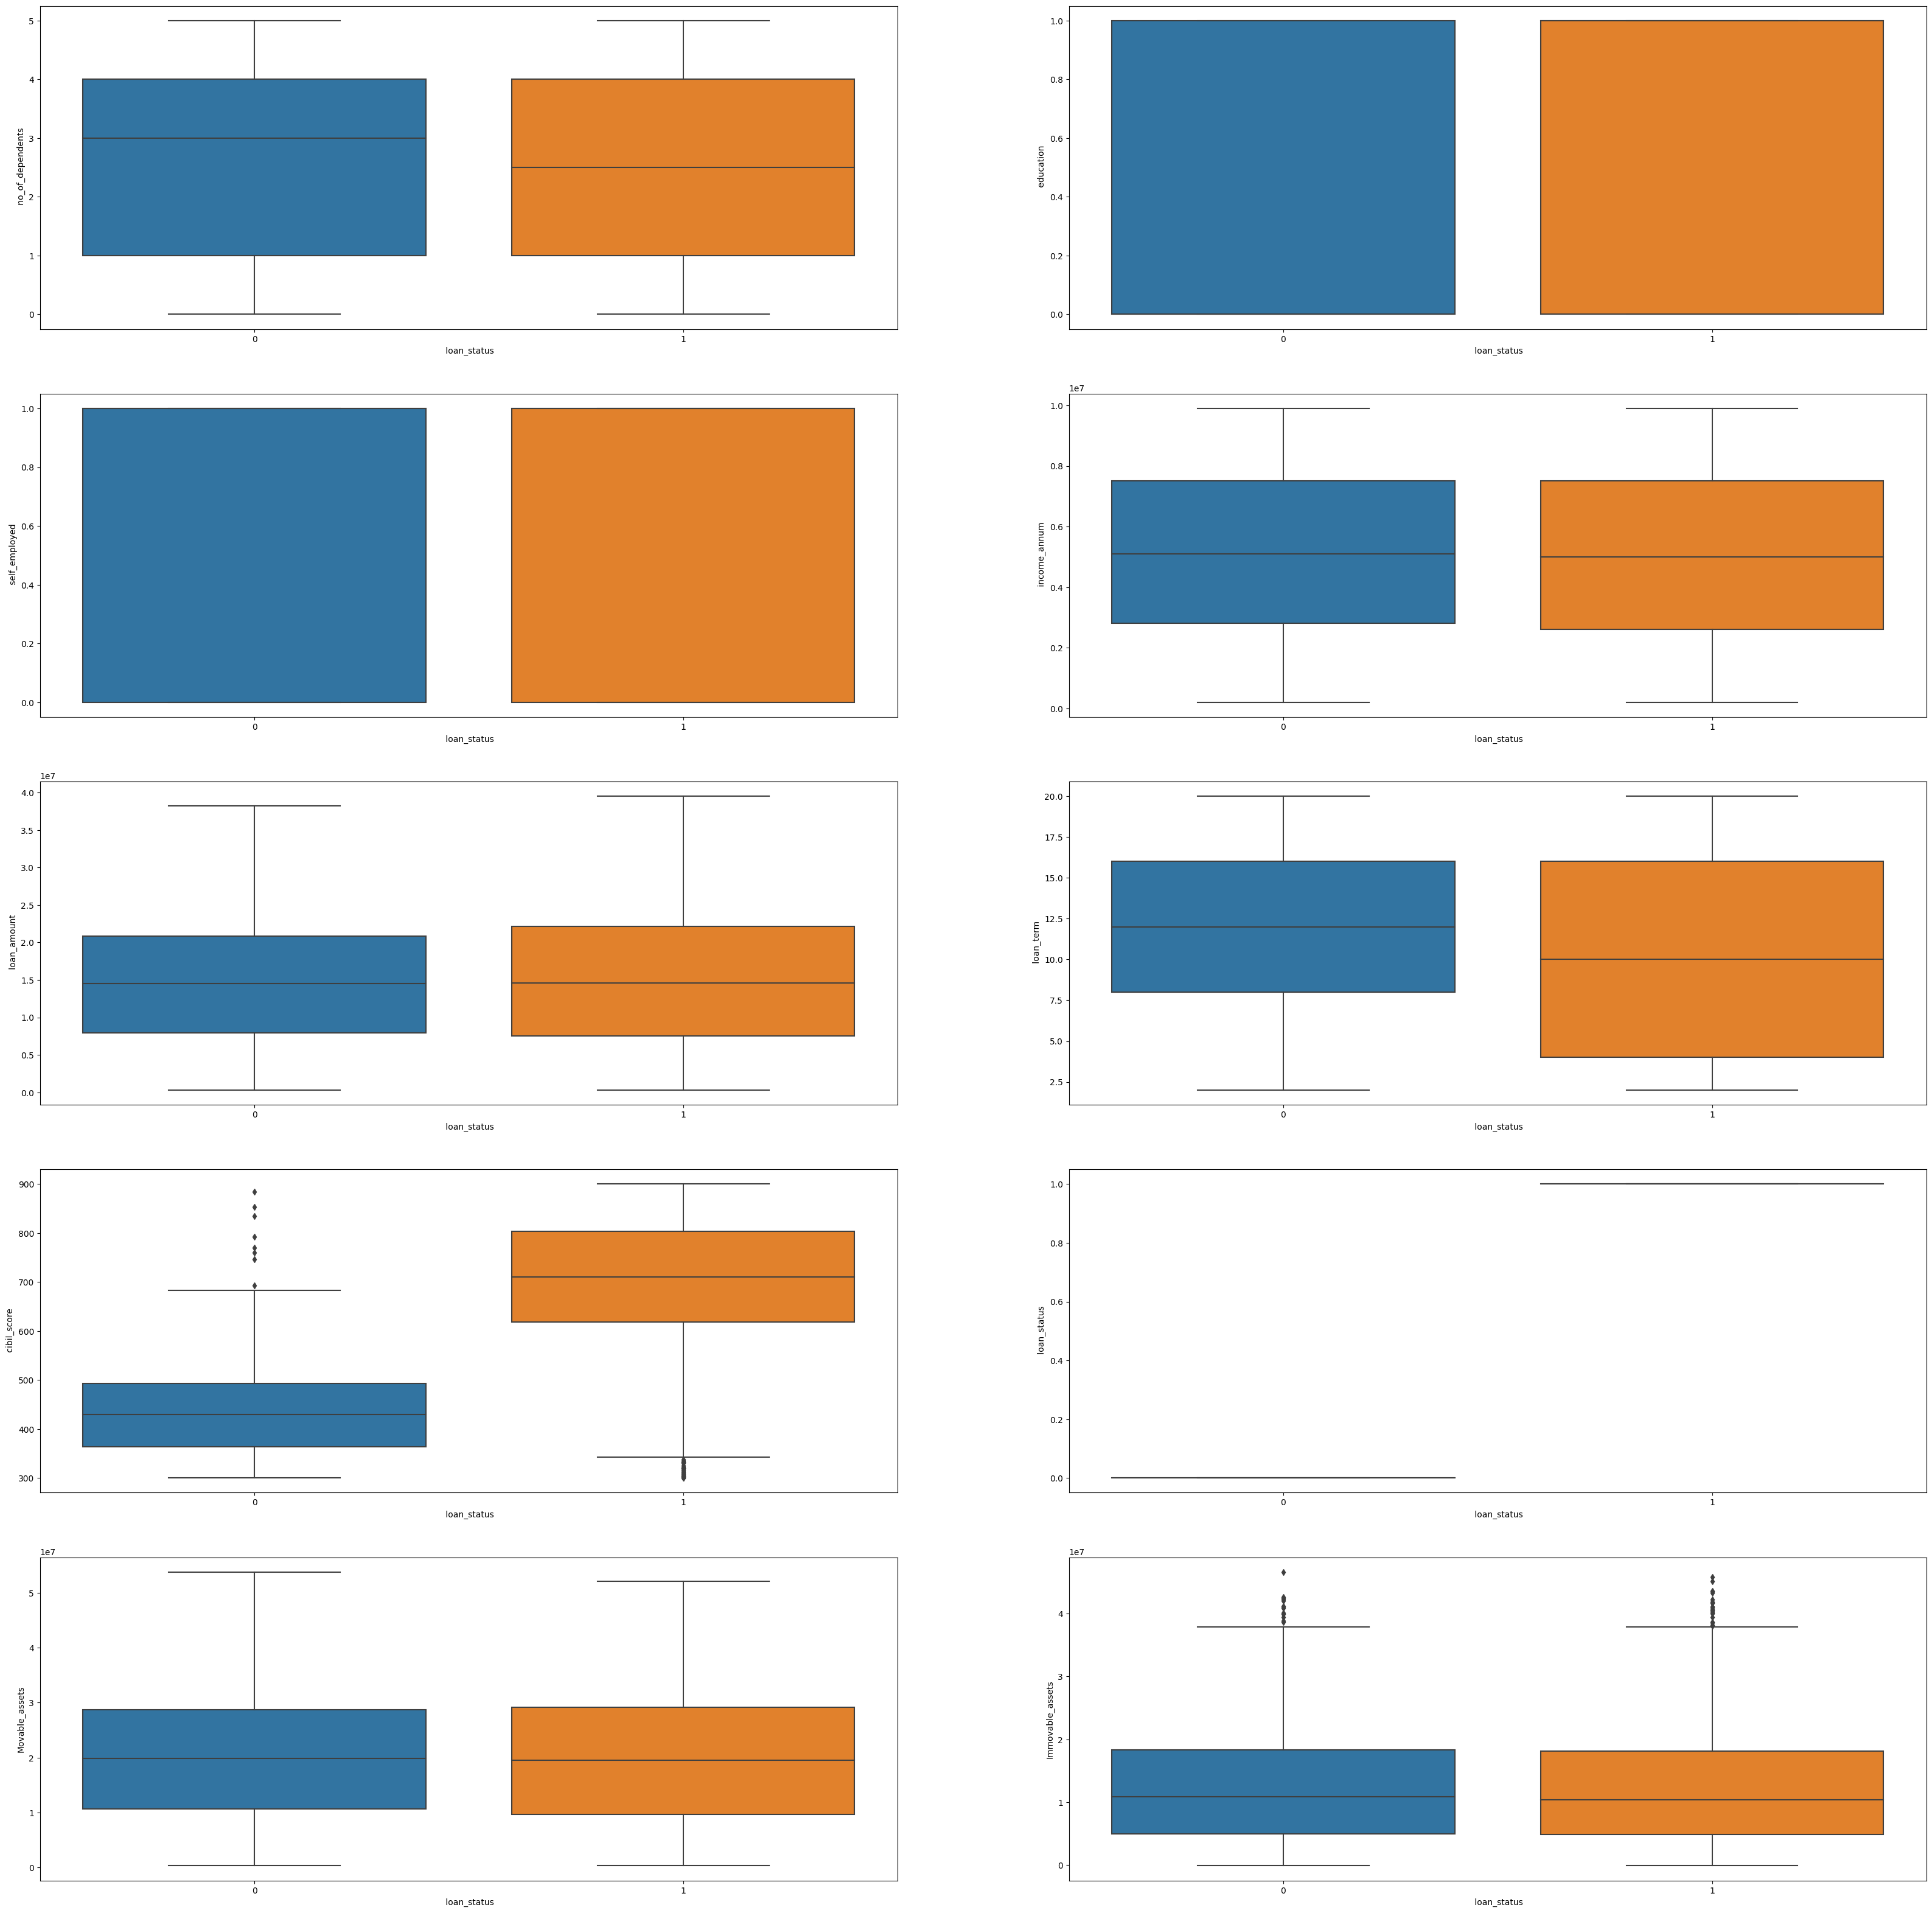

In [39]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, data.columns):
  sns.boxplot(x=' loan_status',y=data[col], ax = ax , data=data)

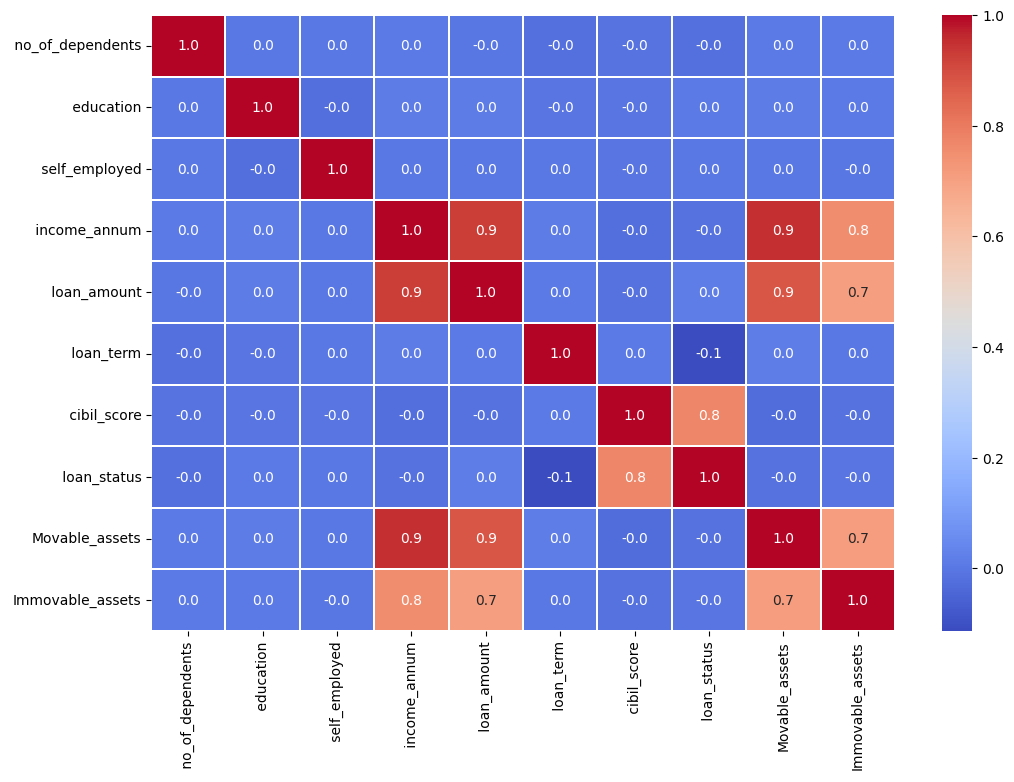

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()


In [41]:
data.corr()[' loan_status']

 no_of_dependents   -0.018114
 education           0.004918
 self_employed       0.000345
 income_annum       -0.015189
 loan_amount         0.016150
 loan_term          -0.113036
 cibil_score         0.770518
 loan_status         1.000000
Movable_assets      -0.013755
Immovable_assets    -0.006200
Name:  loan_status, dtype: float64

Assets Vs Loan Amount

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

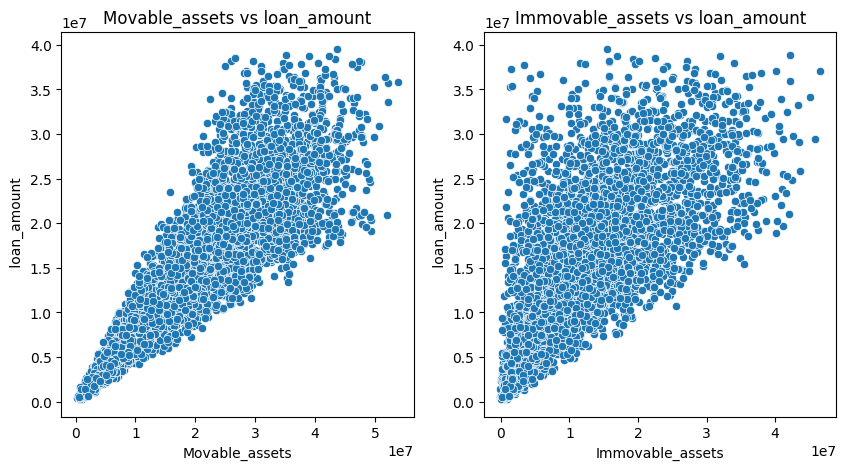

In [42]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = data, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = data, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

This graph tells that there exist a positive relationship between assets and loan amount

Loan Amount Vs Income

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

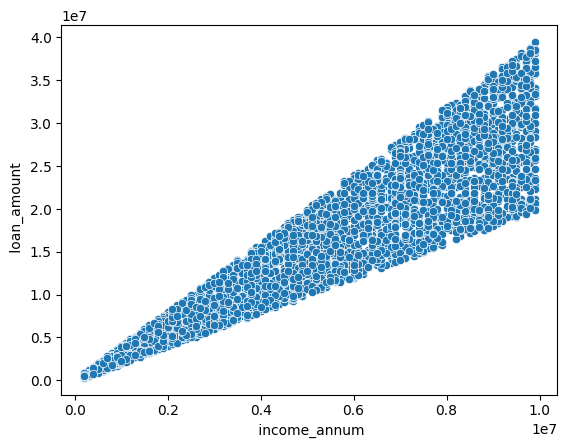

In [43]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = data)

The loan amount and the applicant's annual income share a straightforward connection. When the income is higher, the loan amount tends to be higher as well. This is because the applicant's income plays a major role in determining the appropriate loan amount they can afford to repay.

**Machine learning model**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

In [45]:
x=data.drop(' loan_status',axis=1)
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,30700000,20000000
1,0,0,1,4100000,12200000,8,417,12100000,4900000
2,3,1,0,9100000,29700000,20,506,46100000,11600000
3,3,1,0,8200000,30700000,8,467,31200000,21500000
4,5,0,1,9800000,24200000,20,382,34400000,20600000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,4100000,3300000
4265,0,0,1,3300000,11300000,20,559,12900000,7100000
4266,2,0,0,6500000,23900000,18,457,25400000,13600000
4267,1,0,0,4100000,12800000,8,780,19900000,8900000


In [46]:
y=data[' loan_status']

In [47]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name:  loan_status, Length: 4269, dtype: int64

**Train Test Split**

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**1.LOGISTIC REGRESSION**

In [49]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred=lgr.predict(x_test)

In [51]:
#to calculate metrics
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
recall=recall_score(y_test,y_pred)


In [52]:
print("accuracy:",accuracy)
print("precision:",precision)
print("confusion_matrix:",confusion_matrix)
print("recall:",recall)

accuracy: 0.6135831381733021
precision: 0.6131301289566237
confusion_matrix: [[  1 330]
 [  0 523]]
recall: 1.0


**2.Support Vector Classification**

In [53]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)


SVC()

In [54]:
predictions=model.predict(x_test)

In [55]:
accuracy=accuracy_score(y_test,predictions)
precision=precision_score(y_test,predictions)
#confusion_matrix=confusion_matrix(y_test,predictions)
recall=recall_score(y_test,predictions)

In [56]:
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)

accuracy: 0.6124121779859485
precision: 0.6124121779859485
recall: 1.0


**3.Decision Tree Classifier**

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
dtree_pred=dtree.predict(x_test)

In [60]:
dtree.score(x_train,y_train)

1.0

In [61]:
accuracy=accuracy_score(y_test,dtree_pred)
precision=precision_score(y_test,dtree_pred)
recall=recall_score(y_test,dtree_pred)

In [62]:
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)

accuracy: 0.9765807962529274
precision: 0.979047619047619
recall: 0.982791586998088


**4.Random Forest Classifier**

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
rfc_pred=rfc.predict(x_test)

In [65]:
accuracy=accuracy_score(y_test,dtree_pred)
precision=precision_score(y_test,dtree_pred)
recall=recall_score(y_test,dtree_pred)

In [66]:
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)

accuracy: 0.9765807962529274
precision: 0.979047619047619
recall: 0.982791586998088


Text(518.4494949494949, 0.5, 'Actual')

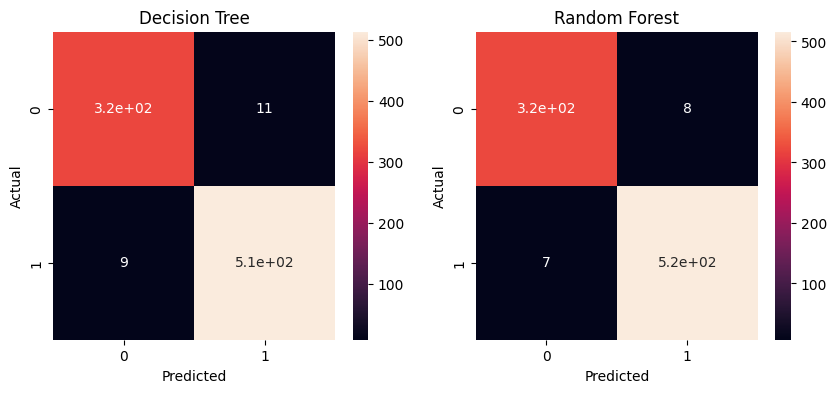

In [67]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

**Hyperparameter Tuning For Random Forest**

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [69]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
rf_Grid.fit(x_train,y_train)
rf_Grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [70]:
rf=RandomForestClassifier(**rf_Grid.best_params_)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20)

In [71]:
rfc_pred = rf.predict(x_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(x_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf

0.9859484777517564

In [73]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

0.9885714285714285

In [74]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       331
           1       0.98      0.99      0.99       523

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854



**Hyperparameter Tuning for Decision tree**

In [75]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [76]:
dtree = DecisionTreeClassifier()

In [77]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [78]:
predictions = best_model.predict(x_test)

In [79]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9742388758782201


In [80]:
cm = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       331
           1       0.98      0.98      0.98       523

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [81]:
f1_dtree=f1_score(predictions,y_test)
f1_dtree

0.9788867562380038

**Model Evaluation**

Text(518.4494949494949, 0.5, 'Actual')

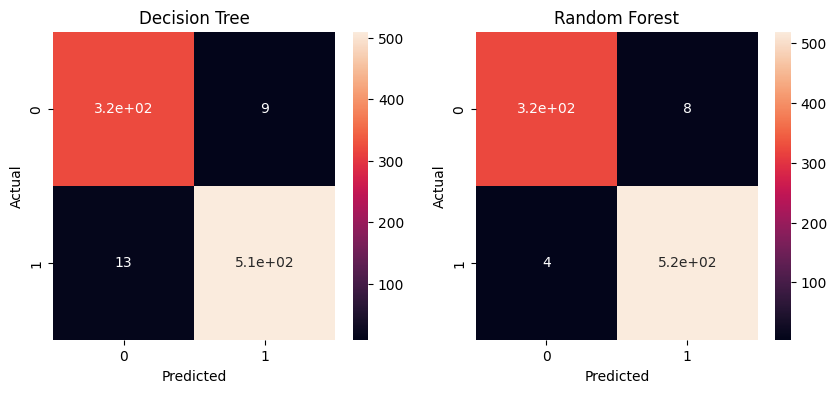

In [82]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

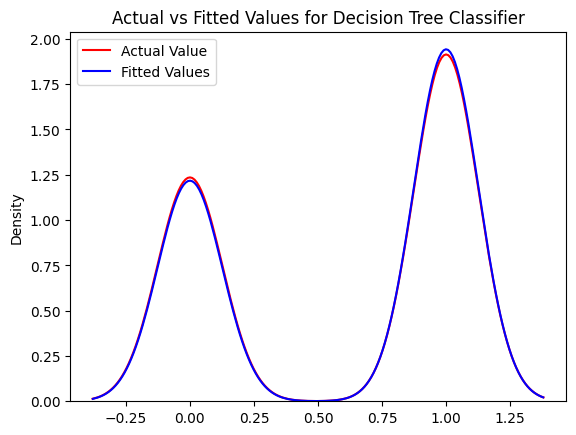

In [83]:
fig, ax = plt.subplots()
sns.kdeplot(predictions, color="r", label="Actual Value", ax=ax)
sns.kdeplot(dtree_pred, color="b", label="Fitted Values", ax=ax)
ax.set_title('Actual vs Fitted Values for Decision Tree Classifier')
ax.legend()

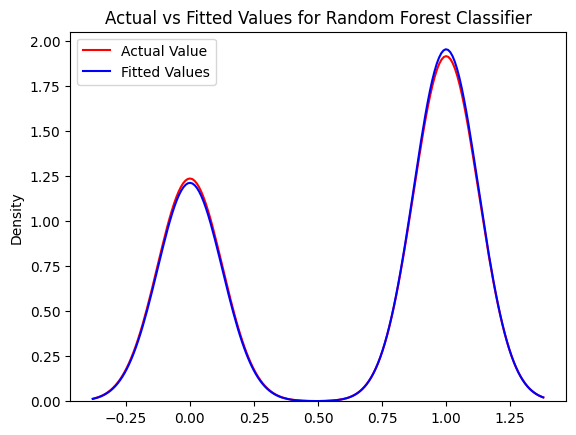

In [84]:
fig, ax = plt.subplots()
sns.kdeplot(predictions, color="r", label="Actual Value", ax=ax)
sns.kdeplot(y_pred1, color="b", label="Fitted Values", ax=ax)
ax.set_title('Actual vs Fitted Values for Random Forest Classifier')
ax.legend()

Classification Report

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       331
           1       0.98      0.98      0.98       523

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       331
           1       0.98      0.99      0.99       523

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854



In [86]:
f1_dtree=f1_score(dtree_pred,y_test)
f1_dtree

0.9809160305343512

In [87]:
f1_rfc=f1_score(rfc_pred,y_test)
f1_rfc

0.9885714285714285

In [88]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('F1 SCORE of Decision Tree is',f1_dtree)
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))
print('F1 SCORE of Random Forest is',f1_rfc)

R2 score:  0.9013361214928977
Mean Squared Error:  0.0234192037470726
Mean Absolute Error:  0.0234192037470726
F1 SCORE of Decision Tree is 0.9809160305343512


R2 score:  0.9408016728957387
Mean Squared Error:  0.01405152224824356
Mean Absolute Error:  0.01405152224824356
F1 SCORE of Random Forest is 0.9885714285714285


**Conclusion**

By using various various supervised machine learning algorithm in this dataset in which Random forest classifier and decision tree classifier shows the highest accuracy of 97.6% and then Hyperparameter tuning is applied to those two models and then the accuracy is been increased to 98.8% in random forest and 97.4% in decision tree classifier.